# MNIST: multilayer perceptrons

Multilayer perceptrons (MLP) have been around for more than 25 years. They are suited to both regression and classification tasks. Here we will use a classic MLP to recognize handwritten digits (MNIST data set), as well as an MLP with a number of more recent twists.

## Data preparation

### Required imports

In [4]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Obtaining the dataset

In Keras' datasets module we have a handle to the MNIST dataset we want to use in this notebook.  Download the training and test set for this data.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Before we can start doing machine learning on the data, some preparations are required.  In this case, the data set is clean, which simplifies this step considerably.  Although it would be better to create a pipeline using the scikit-learn framework, we'll do the preparation by hand in this case.

### Transforming the data

Rather than using the 28 $\times$ 28 images as input, we reshape each image to a 784 array.

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Most learning algorithms work better when the input data is normalized to the interval $[0, 1]$.

In [6]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

The output can be transformed to categorical data, i.e., one category for each digit, rather than a `uint8`. This is a one-hot encoding, so the output is now an array consisting of a single 1.0 value, and nine 0.0 values.  Note that the type of the output is now also `float32`.

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
y_train.shape

(60000, 10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Validation set

In order to make this reproducible, we have to seed the random number generator.

In [10]:
np.random.seed(1234)

During the training, we will require a validation set, so we split the training data into two sets, one for actual training, the other for validation.  Note, we don't touch the test data set at all during the training process.  The default is using 75 % of the data for training, 25 % for validation. This function will also shuffle the data set prior to splitting (hence seeding the random number generator).

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

In [12]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((45000, 784), (15000, 784), (45000, 10), (15000, 10))

### Verification

Since we've done quite some transformations, let's verify whether we didn't mess up.

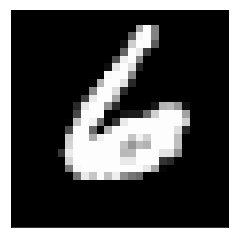

In [20]:
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.imshow(x_train[0].reshape(28, 28), cmap='gray');

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Everything seems fine, input/output are as expected, and we can start doing some machine learning.

## Classic multilayer perceptron (MLP)

We start off training a classic multilayer neural network to familiarie ourselves with the keras framework.

### Required imports

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD
from sklearn.metrics import confusion_matrix

### Model definition

We will create a fully connected neural network with 784 input units (28 $\times$ 28 pixels), two hidden layers with 512 units each, and an output layter with 10 units (ten categories, one per digit). For the two hidden layers, we will use a ReLU activation function, and a SoftMax for the output layer.

In [23]:
np.random.seed(1234)

In [24]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Now we can can compile the model, specifying the loss function (categorical cross-entropy), the optimizer (SGD, Stochastic Gradient Descent), and the metrics (accuracy) we want to use.

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

### Training

In [27]:
model_history = model.fit(x_train, y_train, batch_size=128, epochs=100,
                          verbose=1, validation_data=(x_val, y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 32s 714us/step - loss: 1.2553 - acc: 0.7270 - val_loss: 0.6547 - val_acc: 0.8506
Epoch 2/100
45000/45000 [==============================] - 40s 888us/step - loss: 0.5177 - acc: 0.8752 - val_loss: 0.4437 - val_acc: 0.8839
Epoch 3/100
45000/45000 [==============================] - 28s 614us/step - loss: 0.3984 - acc: 0.8947 - val_loss: 0.3758 - val_acc: 0.8973
Epoch 4/100
45000/45000 [==============================] - 22s 493us/step - loss: 0.3492 - acc: 0.9041 - val_loss: 0.3405 - val_acc: 0.9040
Epoch 5/100
45000/45000 [==============================] - 21s 467us/step - loss: 0.3198 - acc: 0.9113 - val_loss: 0.3187 - val_acc: 0.9073
Epoch 6/100
45000/45000 [==============================] - 29s 637us/step - loss: 0.2992 - acc: 0.9166 - val_loss: 0.2993 - val_acc: 0.9135
Epoch 7/100
45000/45000 [==============================] - 22s 478us/step - loss: 0.2828 - acc: 0.9210 - val_l

Epoch 59/100
45000/45000 [==============================] - 20s 444us/step - loss: 0.0758 - acc: 0.9801 - val_loss: 0.1093 - val_acc: 0.9668
Epoch 60/100
45000/45000 [==============================] - 20s 444us/step - loss: 0.0746 - acc: 0.9800 - val_loss: 0.1075 - val_acc: 0.9669
Epoch 61/100
45000/45000 [==============================] - 20s 440us/step - loss: 0.0732 - acc: 0.9806 - val_loss: 0.1070 - val_acc: 0.9673
Epoch 62/100
45000/45000 [==============================] - 20s 442us/step - loss: 0.0721 - acc: 0.9811 - val_loss: 0.1055 - val_acc: 0.9678
Epoch 63/100
45000/45000 [==============================] - 19s 428us/step - loss: 0.0708 - acc: 0.9817 - val_loss: 0.1057 - val_acc: 0.9679
Epoch 64/100
45000/45000 [==============================] - 19s 432us/step - loss: 0.0697 - acc: 0.9816 - val_loss: 0.1039 - val_acc: 0.9693
Epoch 65/100
45000/45000 [==============================] - 20s 442us/step - loss: 0.0684 - acc: 0.9821 - val_loss: 0.1026 - val_acc: 0.9695
Epoch 66/100


Plot the history of the training process.

In [28]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')

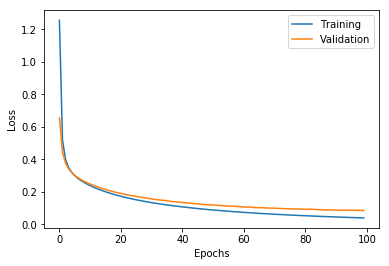

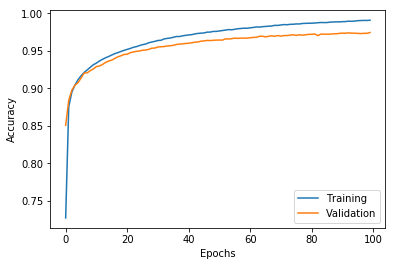

In [29]:
plot_history(model_history)

Let's compare the performance of the model on the training, validation and test set.

model.evaluate(x_train, y_train

In [30]:
model.evaluate(x_val, y_val)

15000/15000 [==============================] - 3s 206us/step


[0.08482145548115173, 0.9743333333333334]

In [31]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 273us/step


[0.08024705321500078, 0.9755]

### Save model

We can save the model as an HDF5 file so that it can later be reloaded.

In [ ]:
model.save('mnist_mlp.h5')

### Dropout layers

In order to reduce overfitting, drop out can be applied, i.e., randomly setting input values to 0 during training. We add a drop-out layer between the hidden layers, and between the last hidden layer and the output layer.

In [32]:
np.random.seed(1234)

In [33]:
dropout_model = Sequential()
dropout_model.add(Dense(512, activation='relu', input_shape=(784,)))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(10, activation='softmax'))

In [34]:
dropout_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [35]:
dropout_model.compile(loss='categorical_crossentropy', optimizer=SGD(),
                      metrics=['accuracy'])

In [36]:
dropout_model_history = dropout_model.fit(x_train, y_train, batch_size=128,
                                          epochs=100, verbose=1,
                                          validation_data=(x_val, y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 21s 475us/step - loss: 1.4015 - acc: 0.6426 - val_loss: 0.6975 - val_acc: 0.8425
Epoch 2/100
45000/45000 [==============================] - 20s 438us/step - loss: 0.6182 - acc: 0.8329 - val_loss: 0.4562 - val_acc: 0.8775
Epoch 3/100
45000/45000 [==============================] - 20s 446us/step - loss: 0.4764 - acc: 0.8642 - val_loss: 0.3832 - val_acc: 0.8941
Epoch 4/100
45000/45000 [==============================] - 20s 451us/step - loss: 0.4160 - acc: 0.8804 - val_loss: 0.3465 - val_acc: 0.9018
Epoch 5/100
45000/45000 [==============================] - 20s 440us/step - loss: 0.3787 - acc: 0.8913 - val_loss: 0.3224 - val_acc: 0.9059
Epoch 6/100
45000/45000 [==============================] - 21s 467us/step - loss: 0.3541 - acc: 0.8979 - val_loss: 0.3022 - val_acc: 0.9124
Epoch 7/100
45000/45000 [==============================] - 20s 440us/step - loss: 0.3328 - acc: 0.9041 - val_l

Epoch 59/100
45000/45000 [==============================] - 20s 454us/step - loss: 0.0977 - acc: 0.9720 - val_loss: 0.1050 - val_acc: 0.9666
Epoch 60/100
45000/45000 [==============================] - 19s 431us/step - loss: 0.0985 - acc: 0.9708 - val_loss: 0.1034 - val_acc: 0.9676
Epoch 61/100
45000/45000 [==============================] - 20s 455us/step - loss: 0.0971 - acc: 0.9720 - val_loss: 0.1029 - val_acc: 0.9676
Epoch 62/100
45000/45000 [==============================] - 21s 473us/step - loss: 0.0960 - acc: 0.9726 - val_loss: 0.1016 - val_acc: 0.9679
Epoch 63/100
45000/45000 [==============================] - 20s 441us/step - loss: 0.0932 - acc: 0.9736 - val_loss: 0.1006 - val_acc: 0.9682
Epoch 64/100
45000/45000 [==============================] - 20s 449us/step - loss: 0.0923 - acc: 0.9730 - val_loss: 0.1001 - val_acc: 0.9687
Epoch 65/100
45000/45000 [==============================] - 20s 446us/step - loss: 0.0919 - acc: 0.9735 - val_loss: 0.0990 - val_acc: 0.9689
Epoch 66/100


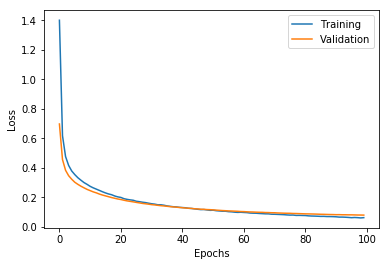

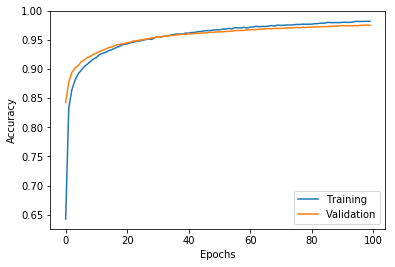

In [37]:
plot_history(dropout_model_history)

Again, let's compare the performance of the model on the training, validation and test set.

In [38]:
dropout_model.evaluate(x_train, y_train)

45000/45000 [==============================] - 10s 215us/step


[0.041321556073468595, 0.9885555555555555]

In [39]:
dropout_model.evaluate(x_val, y_val)

15000/15000 [==============================] - 3s 211us/step


[0.07918607002347708, 0.9754]

In [40]:
dropout_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 226us/step


[0.07670351871140302, 0.9763]

In [ ]:
dropout_model.save('mnist_mlp_dropout.h5')

## Understanding the model

We should try to gain some insight into the model.  There are several ways to do this.

### Required imports

In [14]:
import itertools
import pandas as pd
import seaborn as sns

### Confustion matrix

The model produces some classification errors, it would be interesting to see the type of errors.  Computing a confustion matrix is useful for that prupose.

In [41]:
y_predict_classes = dropout_model.predict_classes(x_test)

In [42]:
y_test_classes = np.argmax(y_test, axis=1)

In [54]:
cm = confusion_matrix(y_test_classes, y_predict_classes)
cm

array([[ 971,    0,    0,    2,    0,    1,    2,    1,    2,    1],
       [   0, 1123,    2,    1,    0,    1,    3,    2,    3,    0],
       [   6,    2, 1006,    2,    2,    0,    3,    7,    4,    0],
       [   0,    0,    5,  990,    0,    5,    0,    4,    3,    3],
       [   3,    0,    2,    0,  962,    0,    3,    3,    2,    7],
       [   4,    0,    0,    6,    2,  866,    7,    1,    3,    3],
       [   6,    3,    0,    0,    7,    5,  933,    0,    4,    0],
       [   1,    8,   10,    3,    0,    0,    0,  998,    0,    8],
       [   3,    0,    4,    4,    3,    4,    4,    6,  944,    2],
       [   3,    4,    1,    6,   11,    2,    2,    7,    3,  970]])

From the confusion matrix, it is clear that, e.g., 2 and 7 get confused, as well as 4 and 9.  Given the data, that should come as no surprise.

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):

    log1p_cm = np.log1p(cm)
    if normalize:
        cm = cm.astype(np.float)/cm.sum(axis=1)[:, np.newaxis]
    
    figure, axes = plt.subplots(figsize=(6, 6))
    axes.imshow(log1p_cm, interpolation='nearest', cmap=cmap)
    axes.set_xticks(classes)
    axes.set_yticks(classes)

    fmt = '{0:.4f}' if normalize else '{0:d}'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        axes.text(j, i, fmt.format(cm[i, j]),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black",
                  fontsize=8)

    plt.tight_layout()
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')

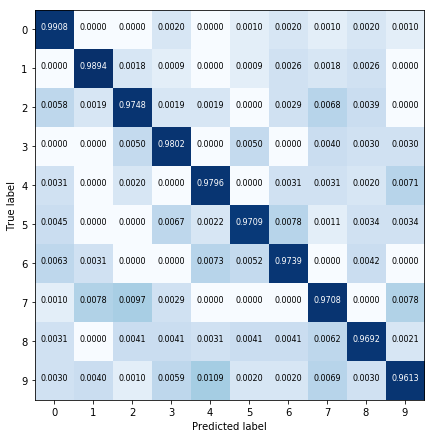

In [104]:
plot_confusion_matrix(cm, range(10), normalize=True)

### Sensitivity to initial conditions

How sensitive is the training process to the initial values of the model?  Let's train and evaluate the model several times, and observe the outcomes.

In [44]:
np.random.seed(1234)
names = ('train', 'val', 'test')
inputs = (x_train, x_val, x_test)
outputs = (y_train, y_val, y_test)
losses = dict()
accuracies = dict()
for name in names:
    losses[name] = []
    accuracies[name] = []
for i in range(10):
    print(f'training model {i+ 1:d}')
    mod = Sequential()
    mod.add(Dense(512, activation='relu', input_shape=(784,)))
    mod.add(Dropout(0.2))
    mod.add(Dense(512, activation='relu'))
    mod.add(Dropout(0.2))
    mod.add(Dense(10, activation='softmax'))
    mod.compile(loss='categorical_crossentropy', optimizer=SGD(),
                metrics=['accuracy'])
    _ = mod.fit(x_train, y_train, batch_size=128, epochs=100,
                verbose=0, validation_data=(x_val, y_val))
    for name, input, output in zip(names, inputs, outputs):
        loss, accuracy = mod.evaluate(input, output)
        losses[name].append(loss)
        accuracies[name].append(accuracy)
    mod.save(f'mnist_mpl_{i + 1:02d}.h5')

Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 22s 488us/step - loss: 1.4015 - acc: 0.6426 - val_loss: 0.6975 - val_acc: 0.8425
Epoch 2/100
45000/45000 [==============================] - 20s 449us/step - loss: 0.6182 - acc: 0.8329 - val_loss: 0.4562 - val_acc: 0.8775
Epoch 3/100
45000/45000 [==============================] - 21s 459us/step - loss: 0.4764 - acc: 0.8642 - val_loss: 0.3832 - val_acc: 0.8941
Epoch 4/100
45000/45000 [==============================] - 21s 458us/step - loss: 0.4160 - acc: 0.8804 - val_loss: 0.3465 - val_acc: 0.9018
Epoch 5/100
45000/45000 [==============================] - 20s 435us/step - loss: 0.3787 - acc: 0.8913 - val_loss: 0.3224 - val_acc: 0.9059
Epoch 6/100
45000/45000 [==============================] - 21s 462us/step - loss: 0.3541 - acc: 0.8979 - val_loss: 0.3022 - val_acc: 0.9124
Epoch 7/100
45000/45000 [==============================] - 21s 475us/step - loss: 0.3328 - acc: 0.9041 - val_l

Epoch 59/100
45000/45000 [==============================] - 21s 471us/step - loss: 0.0977 - acc: 0.9720 - val_loss: 0.1050 - val_acc: 0.9666
Epoch 60/100
45000/45000 [==============================] - 21s 460us/step - loss: 0.0985 - acc: 0.9708 - val_loss: 0.1034 - val_acc: 0.9676
Epoch 61/100
45000/45000 [==============================] - 20s 442us/step - loss: 0.0971 - acc: 0.9720 - val_loss: 0.1029 - val_acc: 0.9676
Epoch 62/100
45000/45000 [==============================] - 21s 457us/step - loss: 0.0960 - acc: 0.9726 - val_loss: 0.1016 - val_acc: 0.9679
Epoch 63/100
45000/45000 [==============================] - 20s 450us/step - loss: 0.0932 - acc: 0.9736 - val_loss: 0.1006 - val_acc: 0.9682
Epoch 64/100
45000/45000 [==============================] - 21s 459us/step - loss: 0.0923 - acc: 0.9730 - val_loss: 0.1001 - val_acc: 0.9687
Epoch 65/100
45000/45000 [==============================] - 22s 485us/step - loss: 0.0919 - acc: 0.9735 - val_loss: 0.0990 - val_acc: 0.9689
Epoch 66/100


45000/45000 [==============================] - 21s 464us/step - loss: 0.0806 - acc: 0.9769 - val_loss: 0.0919 - val_acc: 0.9724
Epoch 74/100
45000/45000 [==============================] - 21s 461us/step - loss: 0.0791 - acc: 0.9769 - val_loss: 0.0913 - val_acc: 0.9727
Epoch 75/100
45000/45000 [==============================] - 20s 454us/step - loss: 0.0779 - acc: 0.9768 - val_loss: 0.0906 - val_acc: 0.9728
Epoch 76/100
45000/45000 [==============================] - 20s 439us/step - loss: 0.0790 - acc: 0.9769 - val_loss: 0.0901 - val_acc: 0.9729
Epoch 77/100
45000/45000 [==============================] - 19s 432us/step - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0899 - val_acc: 0.9727
Epoch 78/100
45000/45000 [==============================] - 20s 448us/step - loss: 0.0759 - acc: 0.9784 - val_loss: 0.0891 - val_acc: 0.9730
Epoch 79/100
45000/45000 [==============================] - 20s 439us/step - loss: 0.0755 - acc: 0.9781 - val_loss: 0.0883 - val_acc: 0.9729
Epoch 80/100
45000/45000 [

45000/45000 [==============================] - 22s 483us/step - loss: 0.0682 - acc: 0.9800 - val_loss: 0.0859 - val_acc: 0.9729
Epoch 88/100
45000/45000 [==============================] - 20s 454us/step - loss: 0.0684 - acc: 0.9802 - val_loss: 0.0854 - val_acc: 0.9733
Epoch 89/100
45000/45000 [==============================] - 20s 438us/step - loss: 0.0667 - acc: 0.9807 - val_loss: 0.0846 - val_acc: 0.9739
Epoch 90/100
45000/45000 [==============================] - 21s 456us/step - loss: 0.0662 - acc: 0.9810 - val_loss: 0.0843 - val_acc: 0.9739
Epoch 91/100
45000/45000 [==============================] - 21s 464us/step - loss: 0.0649 - acc: 0.9806 - val_loss: 0.0839 - val_acc: 0.9739
Epoch 92/100
45000/45000 [==============================] - 20s 438us/step - loss: 0.0639 - acc: 0.9817 - val_loss: 0.0835 - val_acc: 0.9736
Epoch 93/100
45000/45000 [==============================] - 20s 456us/step - loss: 0.0637 - acc: 0.9814 - val_loss: 0.0831 - val_acc: 0.9741
Epoch 94/100
45000/45000 [

10000/10000 [==============================] - 2s 233us/step
Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 21s 470us/step - loss: 1.4061 - acc: 0.6410 - val_loss: 0.7069 - val_acc: 0.8412
Epoch 2/100
45000/45000 [==============================] - 21s 458us/step - loss: 0.6203 - acc: 0.8327 - val_loss: 0.4586 - val_acc: 0.8793
Epoch 3/100
45000/45000 [==============================] - 20s 435us/step - loss: 0.4757 - acc: 0.8645 - val_loss: 0.3852 - val_acc: 0.8925
Epoch 4/100
45000/45000 [==============================] - 20s 451us/step - loss: 0.4175 - acc: 0.8799 - val_loss: 0.3454 - val_acc: 0.9022
Epoch 5/100
45000/45000 [==============================] - 21s 466us/step - loss: 0.3796 - acc: 0.8912 - val_loss: 0.3201 - val_acc: 0.9085
Epoch 6/100
45000/45000 [==============================] - 21s 466us/step - loss: 0.3554 - acc: 0.8980 - val_loss: 0.3014 - val_acc: 0.9132
Epoch 7/100
45000/45000 [========================

45000/45000 [==============================] - 21s 464us/step - loss: 0.2542 - acc: 0.9264 - val_loss: 0.2262 - val_acc: 0.9335
Epoch 14/100
45000/45000 [==============================] - 20s 449us/step - loss: 0.2434 - acc: 0.9302 - val_loss: 0.2194 - val_acc: 0.9357
Epoch 15/100
45000/45000 [==============================] - 21s 456us/step - loss: 0.2369 - acc: 0.9327 - val_loss: 0.2115 - val_acc: 0.9394
Epoch 16/100
45000/45000 [==============================] - 20s 445us/step - loss: 0.2293 - acc: 0.9346 - val_loss: 0.2058 - val_acc: 0.9399
Epoch 17/100
45000/45000 [==============================] - 21s 475us/step - loss: 0.2217 - acc: 0.9362 - val_loss: 0.2002 - val_acc: 0.9423
Epoch 18/100
45000/45000 [==============================] - 21s 462us/step - loss: 0.2137 - acc: 0.9395 - val_loss: 0.1947 - val_acc: 0.9439
Epoch 19/100
45000/45000 [==============================] - 20s 445us/step - loss: 0.2094 - acc: 0.9391 - val_loss: 0.1892 - val_acc: 0.9455
Epoch 20/100
45000/45000 [

45000/45000 [==============================] - 22s 479us/step - loss: 0.1690 - acc: 0.9508 - val_loss: 0.1587 - val_acc: 0.9543
Epoch 28/100
45000/45000 [==============================] - 21s 465us/step - loss: 0.1645 - acc: 0.9524 - val_loss: 0.1561 - val_acc: 0.9550
Epoch 29/100
45000/45000 [==============================] - 21s 462us/step - loss: 0.1613 - acc: 0.9537 - val_loss: 0.1536 - val_acc: 0.9555
Epoch 30/100
45000/45000 [==============================] - 19s 428us/step - loss: 0.1569 - acc: 0.9553 - val_loss: 0.1503 - val_acc: 0.9561
Epoch 31/100
45000/45000 [==============================] - 20s 449us/step - loss: 0.1549 - acc: 0.9552 - val_loss: 0.1474 - val_acc: 0.9576
Epoch 32/100
45000/45000 [==============================] - 20s 454us/step - loss: 0.1494 - acc: 0.9569 - val_loss: 0.1453 - val_acc: 0.9577
Epoch 33/100
45000/45000 [==============================] - 19s 427us/step - loss: 0.1488 - acc: 0.9564 - val_loss: 0.1432 - val_acc: 0.9577
Epoch 34/100
45000/45000 [

/home/gjb/miniconda3/envs/keras/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.610426). Check your callbacks.
  % delta_t_median)
/home/gjb/miniconda3/envs/keras/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.307254). Check your callbacks.
  % delta_t_median)


45000/45000 [==============================] - 21s 460us/step - loss: 0.1772 - acc: 0.9489 - val_loss: 0.1662 - val_acc: 0.9503
Epoch 26/100
45000/45000 [==============================] - 20s 452us/step - loss: 0.1730 - acc: 0.9506 - val_loss: 0.1629 - val_acc: 0.9511
Epoch 27/100
45000/45000 [==============================] - 20s 449us/step - loss: 0.1691 - acc: 0.9514 - val_loss: 0.1594 - val_acc: 0.9525
Epoch 28/100
45000/45000 [==============================] - 21s 469us/step - loss: 0.1655 - acc: 0.9518 - val_loss: 0.1562 - val_acc: 0.9536
Epoch 29/100
45000/45000 [==============================] - 21s 463us/step - loss: 0.1591 - acc: 0.9552 - val_loss: 0.1533 - val_acc: 0.9548
Epoch 30/100
45000/45000 [==============================] - 21s 460us/step - loss: 0.1579 - acc: 0.9559 - val_loss: 0.1506 - val_acc: 0.9549
Epoch 31/100
45000/45000 [==============================] - 21s 461us/step - loss: 0.1545 - acc: 0.9550 - val_loss: 0.1477 - val_acc: 0.9557
Epoch 32/100
45000/45000 [

45000/45000 [==============================] - 26s 567us/step - loss: 0.1320 - acc: 0.9618 - val_loss: 0.1301 - val_acc: 0.9610
Epoch 40/100
45000/45000 [==============================] - 24s 530us/step - loss: 0.1284 - acc: 0.9630 - val_loss: 0.1283 - val_acc: 0.9623
Epoch 41/100
45000/45000 [==============================] - 28s 627us/step - loss: 0.1271 - acc: 0.9629 - val_loss: 0.1263 - val_acc: 0.9627
Epoch 42/100
45000/45000 [==============================] - 27s 606us/step - loss: 0.1251 - acc: 0.9642 - val_loss: 0.1245 - val_acc: 0.9628
Epoch 43/100
45000/45000 [==============================] - 23s 516us/step - loss: 0.1223 - acc: 0.9650 - val_loss: 0.1229 - val_acc: 0.9636
Epoch 44/100
45000/45000 [==============================] - 23s 516us/step - loss: 0.1214 - acc: 0.9650 - val_loss: 0.1216 - val_acc: 0.9643
Epoch 45/100
45000/45000 [==============================] - 22s 493us/step - loss: 0.1178 - acc: 0.9670 - val_loss: 0.1202 - val_acc: 0.9637
Epoch 46/100
45000/45000 [

45000/45000 [==============================] - 21s 468us/step - loss: 0.1068 - acc: 0.9686 - val_loss: 0.1121 - val_acc: 0.9653
Epoch 54/100
45000/45000 [==============================] - 21s 459us/step - loss: 0.1072 - acc: 0.9694 - val_loss: 0.1106 - val_acc: 0.9661
Epoch 55/100
45000/45000 [==============================] - 20s 437us/step - loss: 0.1057 - acc: 0.9691 - val_loss: 0.1097 - val_acc: 0.9665
Epoch 56/100
45000/45000 [==============================] - 21s 456us/step - loss: 0.1032 - acc: 0.9709 - val_loss: 0.1086 - val_acc: 0.9669
Epoch 57/100
45000/45000 [==============================] - 21s 475us/step - loss: 0.1039 - acc: 0.9705 - val_loss: 0.1071 - val_acc: 0.9671
Epoch 58/100
45000/45000 [==============================] - 20s 441us/step - loss: 0.1021 - acc: 0.9696 - val_loss: 0.1068 - val_acc: 0.9677
Epoch 59/100
45000/45000 [==============================] - 22s 483us/step - loss: 0.0990 - acc: 0.9720 - val_loss: 0.1055 - val_acc: 0.9671
Epoch 60/100
45000/45000 [

Losses and accuracies are quite reproducible across runs with different initializations of the model.

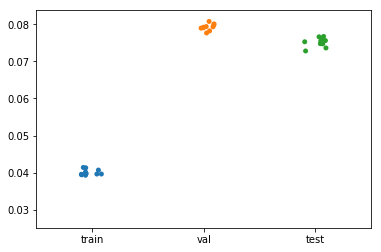

In [52]:
sns.stripplot(data=pd.DataFrame(losses), jitter=0.1);

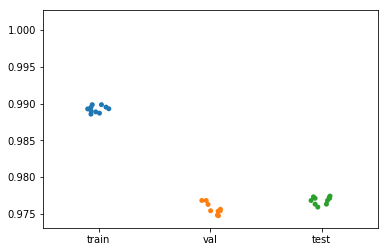

In [51]:
sns.stripplot(data=pd.DataFrame(accuracies), jitter=0.1);